<목차>
- Main concepts of Streamlit
- Development flow
- Data flow
- Display and style data
    - Use magic
    - Write a data frame
    - Draw charts and maps
    - Draw a line chart
    - Plot a map
- Widgets
    - Use checkboxes to show/hide data
    - Use a selectbox for options
- Summary

### Main concepts of Streamlit

- 위에 표시된 대로 스크립트를 실행하자마자 로컬 Streamlit 서버가 실행되고 앱이 기본 웹 브라우저의 새 탭에서 열립니다. 앱은 차트, 텍스트, 위젯, 표 등을 그리는 캔버스입니다.
- st.text는 앱에 원시 텍스트를 작성하고 st.line_chart는 짐작할 수 있듯이 꺾은선형 차트를 그립니다. 사용 가능한 모든 명령을 보려면 API 설명서를 참조하세요.
- [Note] 스크립트에 일부 맞춤 인수를 전달할 때 대시 두 개 뒤에 전달해야 합니다. 그렇지 않으면 인수가 Streamlit 자체에 대한 인수로 해석됩니다.

In [ ]:
streamlit run your_script.py [-- script args]

In [ ]:
# Running
python -m streamlit run your_script.py

# is equivalent to 
streamlit run your_script.py

# 또한, URL을 직접전달 할 수 있다 .이는 Github Gists와 연결되면 편하다
streamlit run https://raw.githubusercontent.com/streamlit/demo-uber-nyc-pickups/master/streamlit_app.py

### Development flow

- 앱을 업데이트할 때마다 소스 파일을 저장하세요. 그렇게 하면 `Streamlit은 변경 사항이 있는지 감지하고 앱을 다시 실행할 것인지 묻습니다`. 
- `소스 코드를 변경할 때마다 앱을 자동으로 업데이트하려면 화면 오른쪽 상단에서 '항상 다시 실행'을 선택하세요`.

- 이를 통해 빠른 대화형 루프에서 작업할 수 있습니다. `코드를 입력하고 저장하고 실시간으로 시험해 본 다음 결과에 만족할 때까지 코드를 더 입력하고 저장하고 시험해 보는 등의 작업을 계속합니다`. 
- 코딩과 실시간 결과 보기 사이의 긴밀한 루프는 Streamlit이 귀하의 삶을 더 쉽게 만드는 방법 중 하나입니다.

Streamlit 버전 1.10.0 이상부터 Streamlit 앱은 Linux 배포판의 루트 디렉터리에서 실행할 수 없습니다. 루트 디렉터리에서 Streamlit 앱을 실행하려고 하면 Streamlit에서 FileNotFoundError: [Errno 2] 해당 파일 또는 디렉터리 없음 오류가 발생합니다. 자세한 내용은 GitHub 문제 #5239를 참조하세요(https://github.com/streamlit/streamlit/issues/5239)

Streamlit 버전 1.10.0 이상을 사용하는 경우 기본 스크립트는 루트 디렉터리가 아닌 다른 디렉터리에 있어야 합니다. Docker를 사용할 때 WORKDIR 명령을 사용하여 기본 스크립트가 있는 디렉터리를 지정할 수 있습니다. 이를 수행하는 방법에 대한 예를 보려면 Dockerfile 만들기를 읽어보세요(https://docs.streamlit.io/knowledge-base/tutorials/deploy/docker#create-a-dockerfile)

### Data flow

- Streamlit의 아키텍처를 사용하면 일반 Python 스크립트를 작성하는 것과 동일한 방식으로 앱을 작성할 수 있습니다. 
- 이를 잠금 해제하기 위해 Streamlit 앱에는 고유한 데이터 흐름이 있습니다. 
- 화면에서 무언가를 업데이트해야 할 때마다 Streamlit은 전체 Python 스크립트를 위에서 아래로 다시 실행합니다.

이는 두 가지 상황에서 발생할 수 있습니다.
- 앱의 소스 코드를 수정할 때마다.
- 사용자가 앱의 위젯과 상호작용할 때마다. 예를 들어 슬라이더를 끌 때, 입력 상자에 텍스트를 입력할 때, 버튼을 클릭할 때 등이 있습니다.

- on_change(또는 on_click) 매개변수를 통해 `콜백이 위젯에 전달될 때마다 콜백은 항상 스크립트의 나머지 부분보다 먼저 실행됩니다`. 
- 콜백 API에 대한 자세한 내용은 세션 상태 API 참조 가이드를 참조하세요.
  
- 이 모든 작업을 빠르고 원활하게 수행하기 위해 Streamlit은 뒤에서 여러분을 위해 몇 가지 무거운 작업(heavy lifting for you behind the scenes)을 수행합니다. 
- 이 이야기에서 가장 큰 역할을 하는 것은 `개발자가 앱을 다시 실행할 때 비용이 많이 드는 특정 계산을 건너뛸 수 있게 해주는 @st.cache_data 데코레이터`입니다.
- 캐싱에 대해서는 이 페이지 뒷부분에서 다루겠습니다.


### Display and style data

- Streamlit 앱에 데이터(테이블, 배열, 데이터 프레임)를 표시하는 방법에는 몇 가지가 있습니다. 
- 아래에서는 텍스트부터 테이블까지 무엇이든 쓰는 데 사용할 수 있는 `Magic` 및 `st.write()`를 소개합니다. 
- 그런 다음 데이터 시각화를 위해 특별히 설계된 방법을 살펴보겠습니다.

- Use Magic  
    - 변수가 리터럴 값을 볼 때 마다 st.write()를 사용하여 자동으로 앱에 쓴다.  
- Write a data frame  
    - st.write()는 텍스트, 데이터, Matplotlib 그림, 알테어 차트 등 거의 모든 것을 st.write()에 전달할 수 있습니다.  

In [2]:
import streamlit as st
import pandas as pd
df = pd.DataFrame({
  'first column': [1, 2, 3, 4],
  'second column': [10, 20, 30, 40]
})

df

,first column,second column
0,1,10
1,2,20
2,3,30
3,4,40


In [3]:
import streamlit as st
import pandas as pd

st.write("Here's our first attempt at using data to create a table:")
st.write(pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
}))

2024-02-25 14:09:47.540 
  command:

    streamlit run c:\Users\ADMIN\anaconda3\envs\watsonx\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


- 데이터를 표시하는 데 사용할 수 있는 st.dataframe() 및 st.table()과 같은 다른 데이터 관련 함수도 있습니다. 이러한 기능을 언제 사용해야 하는지, 그리고 데이터 프레임에 색상과 스타일을 추가하는 방법을 살펴보겠습니다.

Q. `write에 pd.DataFrame을 인수로 넣을 수 있다면, st.dataframe(), st.table()등 추가로 배울 것들이 왜 필요한지 의문을 가질 수 있다. pd.Dataframe(), pd.table()을 st.write에 넣으면 될 것이기 때문이다`.

- "나는 왜 항상 st.write()를 사용하지 않는 걸까?"라고 자문할 수도 있습니다. 몇 가지 이유가 있습니다:

- Magic 및 st.write()는 전달한 데이터 유형을 검사한 다음 앱에서 이를 가장 잘 렌더링하는 방법을 결정합니다. 
- 때로는 다른 방식으로 그려보고 싶을 때도 있습니다. `예를 들어 데이터프레임을 대화형 테이블로 그리는 대신 st.table(df)을 사용하여 정적 테이블로 그릴 수 있습니다`.
- 두 번째 이유는 `다른 메서드가 데이터를 추가하거나 교체하여 사용하고 수정할 수 있는 개체를 반환하기 때문입니다`.
- 마지막으로, 보다 구체적인 Streamlit 메서드를 사용하는 경우 추가 인수를 전달하여 해당 동작을 사용자 지정할 수 있습니다.

In [ ]:
import streamlit as st
import numpy as np

dataframe = np.random.randn(10, 20)
st.dataframe(dataframe)

# Pandas Styler 개체를 사용하여 대화형 테이블의 일부 요소를 강조 표시하는 첫 번째 예를 확장해 보겠습니다.
dataframe = pd.DataFrame(np.random.randn(10, 20),
                        columns=('col %d' % i for i in range(20)))

st.dataframe(dataframe.style.highlight_max(axis=0))
st.table(dataframe)

#### Draw charts and maps
#### Draw a line chart
#### Plot a map
#### Widgets
- 데이터나 모델을 탐색하려는 상태로 설정한 경우 st.slider(), st.button() 또는 st.selectbox()와 같은 위젯을 추가할 수 있습니다. 정말 간단합니다. 위젯을 변수로 처리합니다.

In [ ]:
import streamlit as st
x = st.slider('x')  # 👈 this is a widget
st.write(x, 'squared is', x * x)

- 처음 실행 시 위 앱은 "0의 제곱은 0입니다"라는 텍스트를 출력해야 합니다. 그런 다음 사용자가 위젯과 상호 작용할 때마다 `Streamlit은 단순히 스크립트를 위에서 아래로 다시 실행하여 위젯의 현재 상태를 프로세스의 변수에 할당`합니다.

- 예를 들어, `사용자가 슬라이더를 위치 10으로 이동하면 Streamlit은 위의 코드를 다시 실행하고 이에 따라 x를 10으로 설정합니다. 이제 "10의 제곱은 100입니다"라는 텍스트가 표시`됩니다.

- 위젯의 고유 키로 사용할 문자열을 지정하도록 선택한 경우 키를 통해 위젯에 액세스할 수도 있습니다.

In [ ]:
import streamlit as st
st.text_input("Your name", key="name")

# You can access the value at any point with:
st.session_state.name

- 키가 있는 모든 위젯은 동으로 세션 상태에 추가됩니다.
- 세션 상태, 위젯 상태와의 연결 및 제한 사항에 대한 자세한 내용은 세션 상태 API 참조 가이드를 참조하세요.
https://docs.streamlit.io/library/api-reference/session-state

#### Use checkboxes to show/hide data
- 체크박스의 한 가지 사용 사례는 앱에서 특정 차트나 섹션을 숨기거나 표시하는 것입니다. st.checkbox()는 위젯 라벨인 단일 인수를 취합니다. 이 샘플에서는 확인란을 사용하여 조건문을 전환합니다.

In [ ]:
if st.checkbox('Show dataframe'):
   chart_data = pd.DataFrame(
       np.random.randn(20, 3),
       columns=['a', 'b', 'c'])

   st.dataframe(chart_data)

### Layout


- Streamlit을 사용하면 st.sidebar를 사용하여 왼쪽 패널 사이드바에서 위젯을 쉽게 구성할 수 있습니다.
- st.sidebar에 전달된 각 요소는 왼쪽에 고정되어 사용자가 UI 컨트롤에 계속 액세스하면서 앱 콘텐츠에 집중할 수 있습니다.
- 예를 들어, 사이드바에 선택 상자와 슬라이더를 추가하려면 st.slider 및 st.selectbox 대신 st.sidebar.slider 및 st.sidebar.selectbox를 사용하십시오.  
==> `.을 붙여서 계속 기능을 붙이면 된다!!`

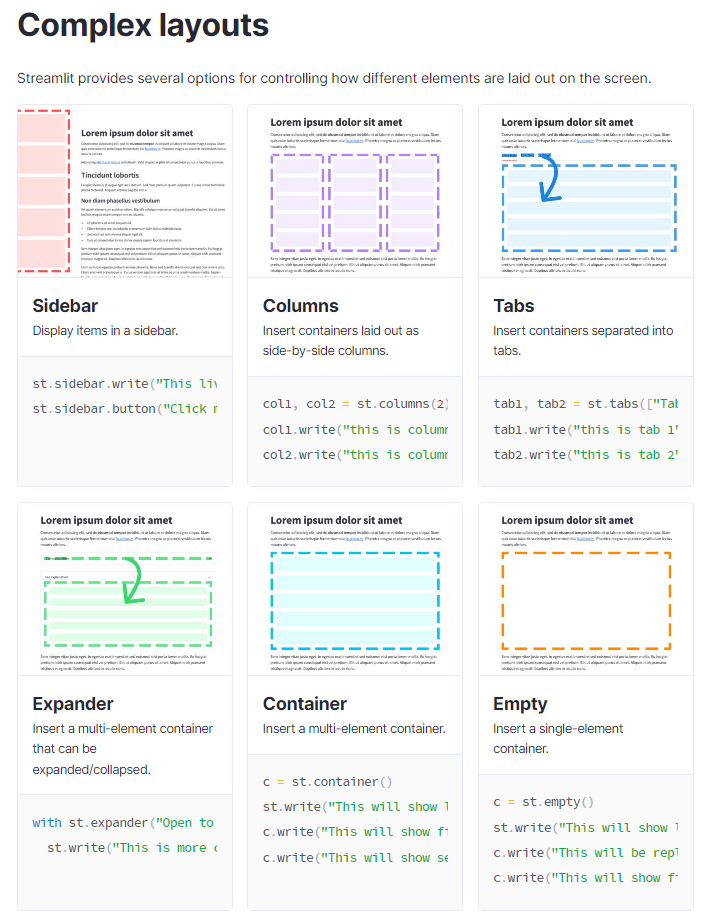

- 사이드바 외에도 Streamlit은 앱 레이아웃을 제어할 수 있는 여러 가지 다른 방법을 제공합니다. 
- st.columns를 사용하면 위젯을 나란히 배치할 수 있으며 st.expander를 사용하면 큰 콘텐츠를 숨겨 공간을 절약할 수 있습니다.

#### Show Progress
- 앱에 장기 실행 계산을 추가할 때 st.progress()를 사용하여 실시간으로 상태를 표시할 수 있습니다.
- 먼저 시간을 가져오겠습니다. time.sleep() 메서드를 사용하여 장기 실행 계산을 시뮬레이션하겠습니다.

In [ ]:
st.write('Starting a long computation...')

# Add a placeholder
latest_iteration = st.empty()
bar = st.progress(0)

for i in range(100):
    # Update the progress bar with each iteration.
    latest_iteration.text(f"Iteration {i+1}")
    bar.progress(i+1)
    time.sleep(0.2)

st.write('...and now we\'re done!')